In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?**

In [58]:
# Loading the dataset
flight_data=pd.read_excel('flight_price.xlsx')

In [59]:
flight_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [60]:
flight_data['date']=flight_data['Date_of_Journey'].str.split('/').str[0]
flight_data['month']=flight_data['Date_of_Journey'].str.split('/').str[1]
flight_data['year']=flight_data['Date_of_Journey'].str.split('/').str[2]

In [61]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  date             10683 non-null  object
 12  month            10683 non-null  object
 13  year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [62]:
flight_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [65]:
flight_data['Dep_hour']=flight_data['Dep_Time'].str.split(':').str[0]
flight_data['Dep_mins']=flight_data['Dep_Time'].str.split(':').str[1]

In [24]:
df.drop('Dep_Time', axis=1,inplace=True)

In [25]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,04,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,04,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,04,2019,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,01,03,2019,11,30


In [66]:
flight_data['Arrival_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
flight_data['Arrival_mins']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [67]:
flight_data.head(30)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,16,50,21,35
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,06,2019,09,00,11,25
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,03,2019,18,55,10,25
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,01,03,2019,08,00,05,05
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,03,2019,08,55,10,25
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,05,2019,11,25,19,15


In [28]:
def convert_into_minutes(Duration):
  total_minutes=0
  for i in Duration.split():
    if 'h' in i:
      total_minutes+=int(i.replace('h', ''))*60
    if 'm' in i:
      total_minutes+=int(i.replace('m',''))
  return total_minutes

In [69]:
flight_data['Duration']=flight_data['Duration'].apply(convert_into_minutes)

In [70]:
flight_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,03,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,05,2019,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,06,2019,09,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,05,2019,18,05,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,non-stop,No info,4107,9,04,2019,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,non-stop,No info,4145,27,04,2019,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,non-stop,No info,7229,27,04,2019,08,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,non-stop,No info,12648,01,03,2019,11,30,14,10


In [71]:
flight_data.drop(['Additional_Info', 'Route'],axis=1,inplace=True)

In [72]:
flight_data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,date,month,year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,3897,24,03,2019,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,445,2 stops,7662,1,05,2019,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,13882,9,06,2019,09,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,325,1 stop,6218,12,05,2019,18,05,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,285,1 stop,13302,01,03,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,150,non-stop,4107,9,04,2019,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,155,non-stop,4145,27,04,2019,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,180,non-stop,7229,27,04,2019,08,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,160,non-stop,12648,01,03,2019,11,30,14,10


In [73]:
flight_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.**

In [75]:
flight_prices = flight_data['Price']

In [76]:
# Use describe() to get the distribution
flight_prices_distribution = flight_prices.describe()

In [77]:
print("Summary Statistics of Flight Prices:")
print(flight_prices_distribution)

Summary Statistics of Flight Prices:
count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


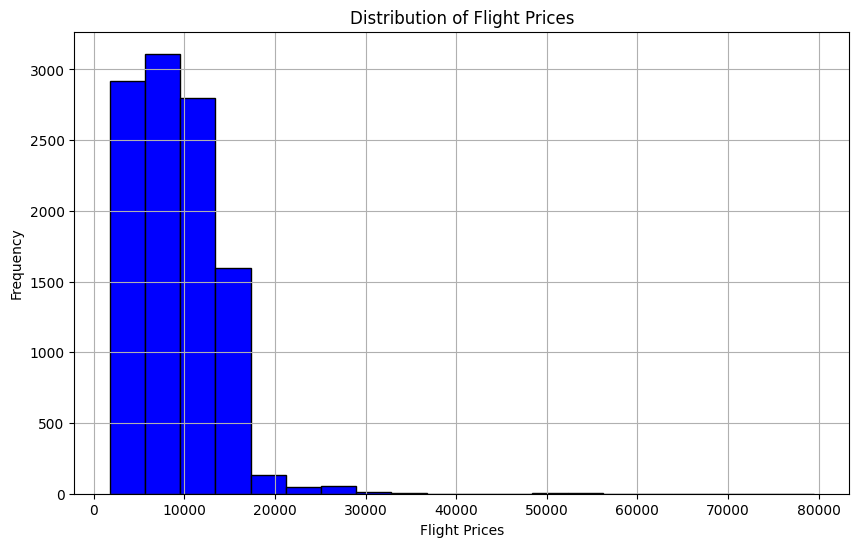

In [78]:
# Create histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(flight_prices, bins=20, color='blue', edgecolor='black')
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.grid(True)
plt.show()

**Q3. What is the range of prices in the dataset? What is the minimum and maximum price?**

In [79]:
# Calculate range, minimum, and maximum prices
price_range = flight_prices.max() - flight_prices.min()
min_price = flight_prices.min()
max_price = flight_prices.max()

print("Range of Prices in the Dataset:", price_range)
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)

Range of Prices in the Dataset: 77753
Minimum Price: 1759
Maximum Price: 79512


**Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.**

<Figure size 1200x800 with 0 Axes>

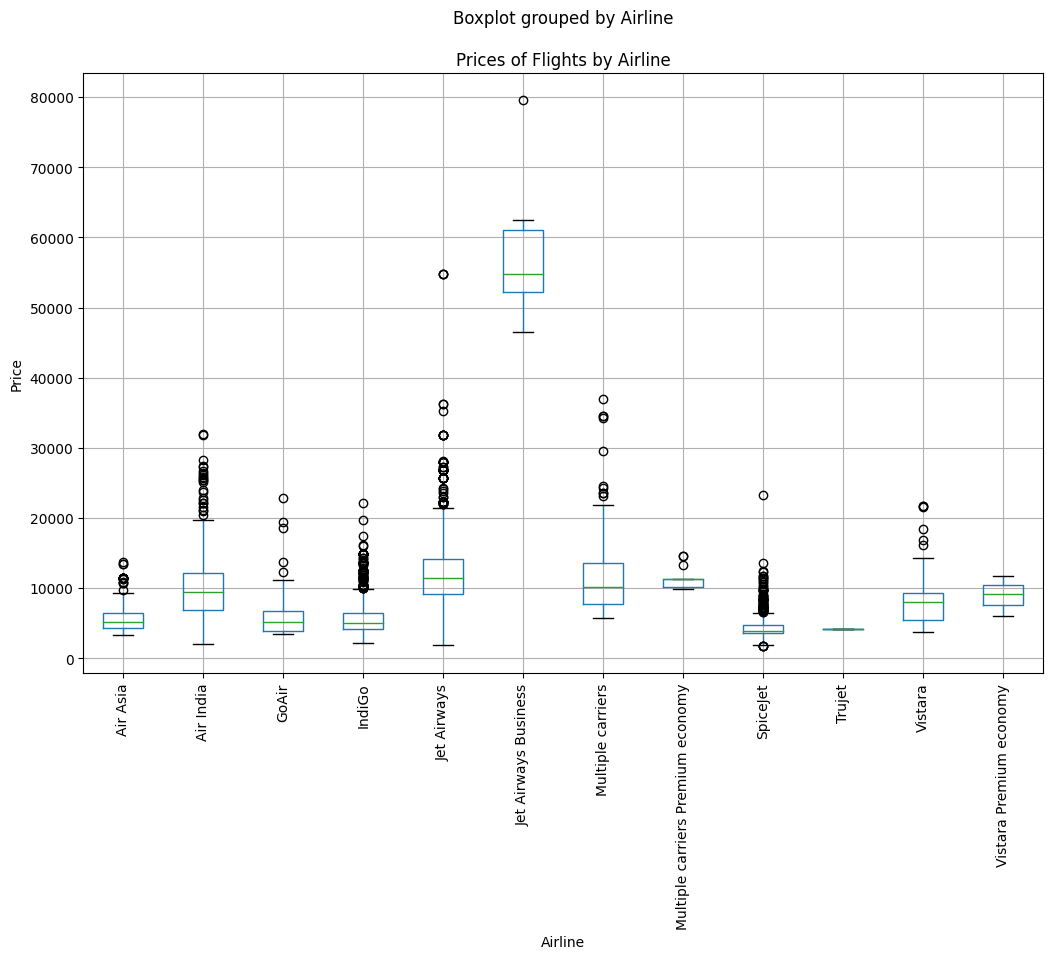

In [80]:
# Create a boxplot to compare the prices of different airlines
plt.figure(figsize=(12, 8))
flight_data.boxplot(column='Price', by='Airline', figsize=(12, 8), rot=90)
plt.title('Prices of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

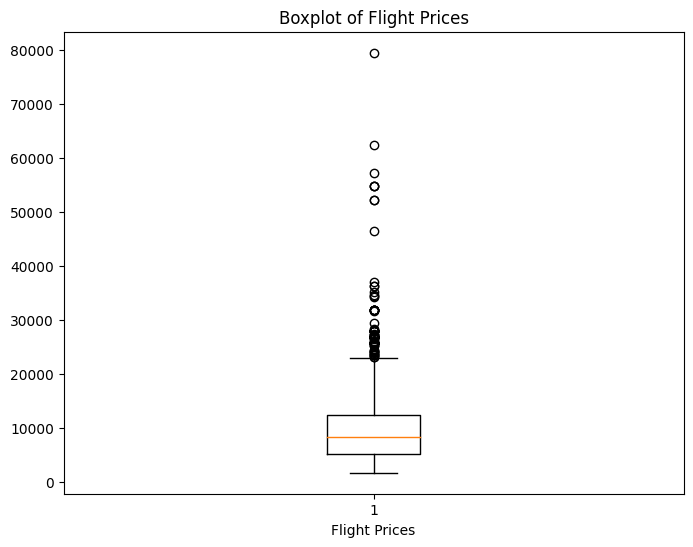

In [81]:
# Create a boxplot potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(flight_prices)
plt.xlabel('Flight Prices')
plt.title('Boxplot of Flight Prices')
plt.show()

In [82]:
# Calculate mean and median with outliers
mean_with_outliers = flight_prices.mean()
median_with_outliers = flight_prices.median()

In [83]:
# Identify potential outliers using the interquartile range (IQR)
Q1 = flight_prices.quantile(0.25)
Q3 = flight_prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [84]:
outliers = flight_prices[(flight_prices < lower_bound) | (flight_prices > upper_bound)]

In [85]:
# Remove potential outliers and recalculate mean and median
flight_prices_without_outliers = flight_prices[~flight_prices.isin(outliers)]
mean_without_outliers = flight_prices_without_outliers.mean()
median_without_outliers = flight_prices_without_outliers.median()

print("With outliers:")
print("Mean:", mean_with_outliers)
print("Median:", median_with_outliers)
print("\nWithout outliers:")
print("Mean:", mean_without_outliers)
print("Median:", median_without_outliers)

With outliers:
Mean: 9087.064120565385
Median: 8372.0

Without outliers:
Mean: 8897.661724431013
Median: 8355.0


Outlier datapoints are marked as dots in the box plot. While the mean is heavily influenced by outliers, the median remains stable, providing a more reliable measure of central tendency.

**Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?**

In [105]:
# Convert the 'Date_of_Journey' column to datetime format
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'], format='%d/%m/%Y')

In [106]:
# Flight prices analysis over time (by month)
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
monthly_avg_prices = flight_data.groupby('Month')['Price'].mean()

In [107]:
flight_data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,date,month,year,Dep_hour,Dep_mins,Arrival_hour,Arrival_mins,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,3897,24,03,2019,22,20,01,10,3
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,445,2 stops,7662,1,05,2019,05,50,13,15,1
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,13882,9,06,2019,09,25,04,25,9
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,325,1 stop,6218,12,05,2019,18,05,23,30,12
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,285,1 stop,13302,01,03,2019,16,50,21,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,150,non-stop,4107,9,04,2019,19,55,22,25,9
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,155,non-stop,4145,27,04,2019,20,45,23,20,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,180,non-stop,7229,27,04,2019,08,20,11,20,4
10681,Vistara,2019-01-03,Banglore,New Delhi,11:30,14:10,160,non-stop,12648,01,03,2019,11,30,14,10,1


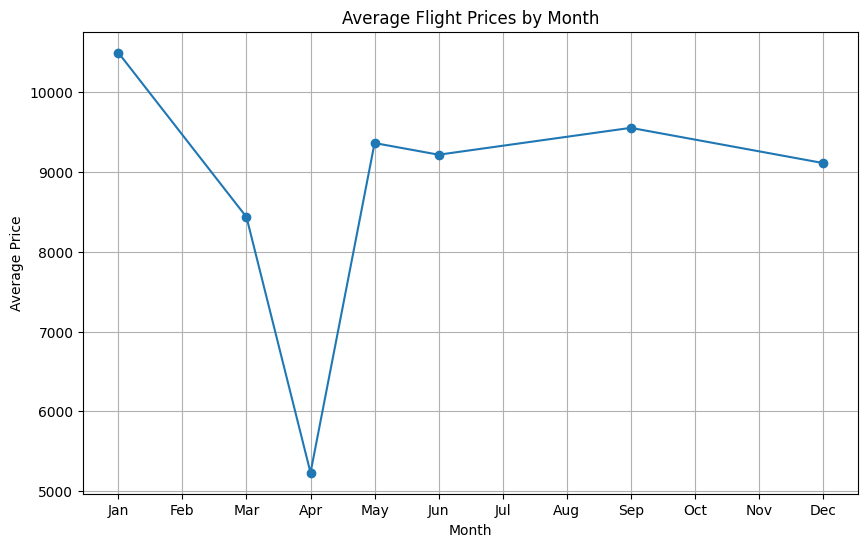

In [108]:
# Visualization of the flight prices over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_prices.index, monthly_avg_prices.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [109]:
# Identify Peak Travel Season
peak_season = monthly_avg_prices.idxmax()

In [110]:
# Dictionary to map month index to month name
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}


In [111]:
# Display Findings
print(f"The peak travel season is in {month_names[peak_season]}, with the highest average flight prices.")

The peak travel season is in January, with the highest average flight prices.


**Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?**

In [112]:
# Extract month and year from Date of Journey
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Year'] = flight_data['Date_of_Journey'].dt.year

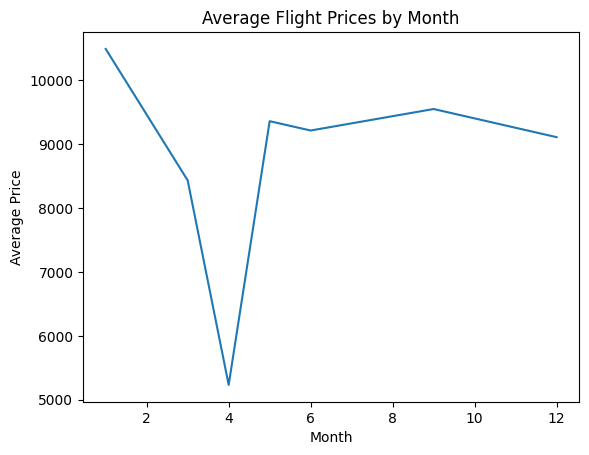

In [118]:
# Group flight prices by month and create visualization
monthly_avg_prices = flight_data.groupby('Month')['Price'].mean()
plt.plot(monthly_avg_prices.index, monthly_avg_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.show()

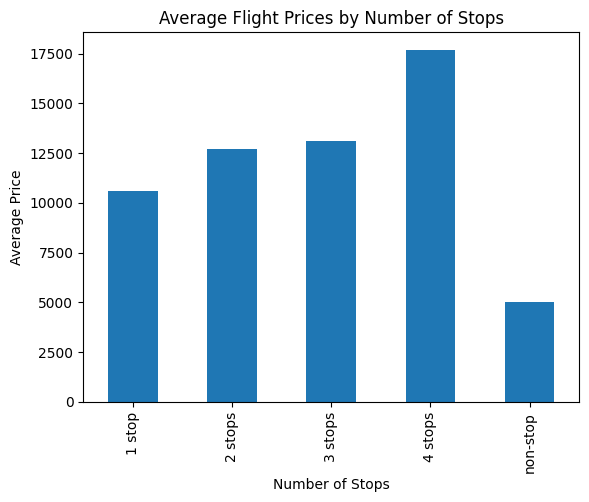

In [119]:
# Calculate average prices for flights with different numbers of stops
avg_prices_by_stops = flight_data.groupby('Total_Stops')['Price'].mean()
avg_prices_by_stops.plot(kind='bar')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Number of Stops')
plt.show()

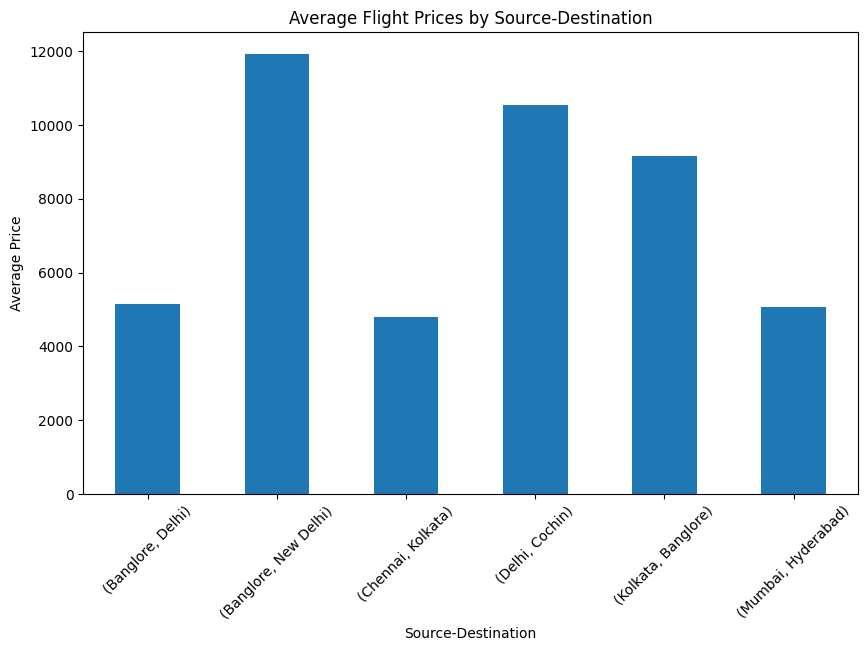

In [120]:
# Calculate average prices for different source-destination pairs
avg_prices_by_route = flight_data.groupby(['Source', 'Destination'])['Price'].mean()
avg_prices_by_route.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Source-Destination')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Source-Destination')
plt.xticks(rotation=45)
plt.show()


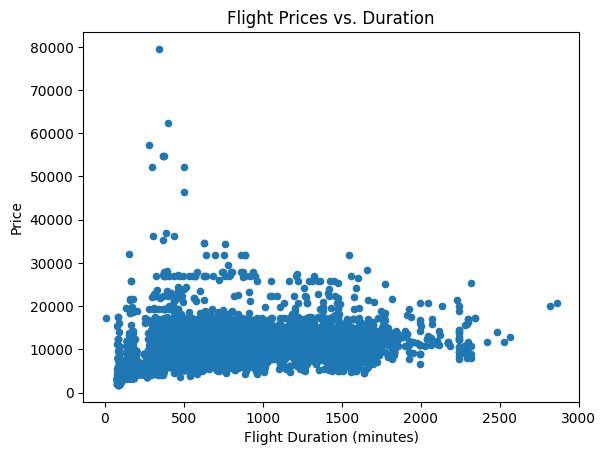

In [121]:
# Relationship between flight duration and prices
flight_data.plot.scatter(x='Duration', y='Price')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Price')
plt.title('Flight Prices vs. Duration')
plt.show()


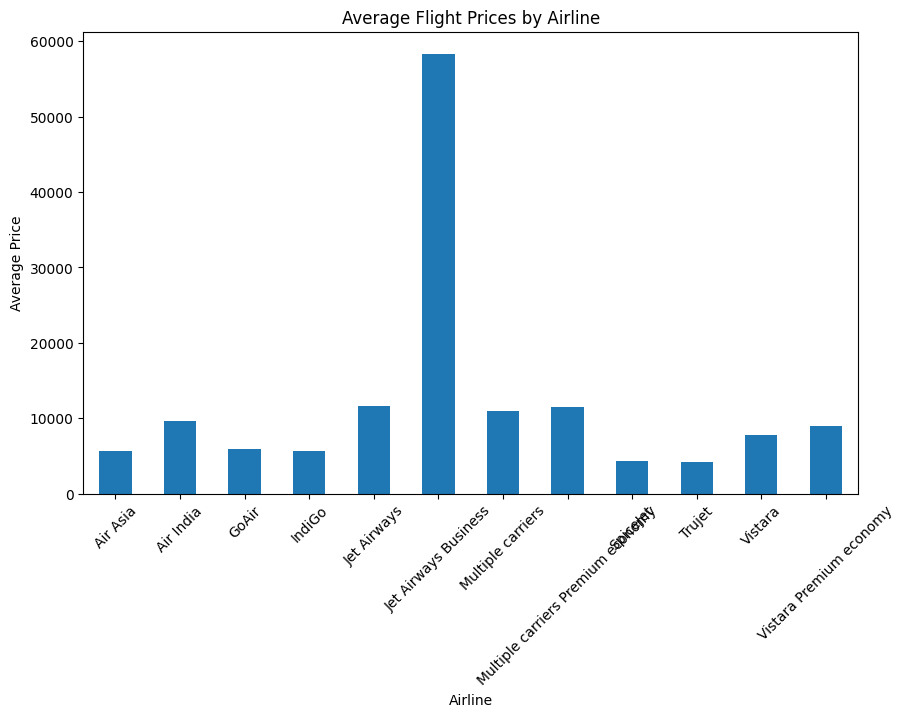

In [122]:
# Compare average prices for different airlines
avg_prices_by_airline = flight_data.groupby('Airline')['Price'].mean()
avg_prices_by_airline.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Airline')
plt.xticks(rotation=45)
plt.show()

**Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?**

In [124]:
# Extract month, quarter, and week from Date of Journey
flight_data['Date_of_Journey'] = pd.to_datetime(flight_data['Date_of_Journey'])
flight_data['Month'] = flight_data['Date_of_Journey'].dt.month
flight_data['Quarter'] = flight_data['Date_of_Journey'].dt.quarter
flight_data['Week'] = flight_data['Date_of_Journey'].dt.isocalendar().week

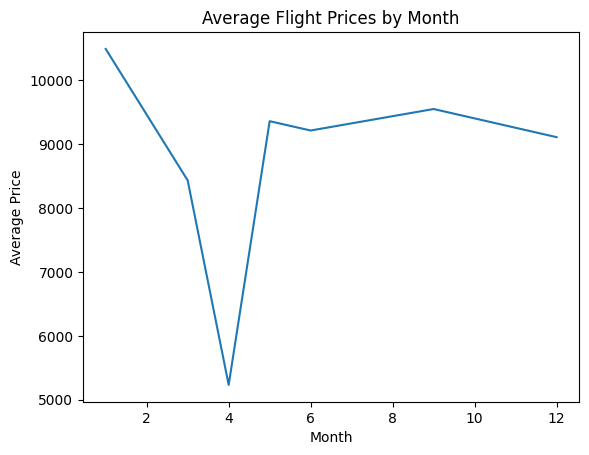

In [125]:
# Group flight prices by month and visualize
monthly_avg_prices = flight_data.groupby('Month')['Price'].mean()
plt.plot(monthly_avg_prices.index, monthly_avg_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.show()

<Figure size 800x600 with 0 Axes>

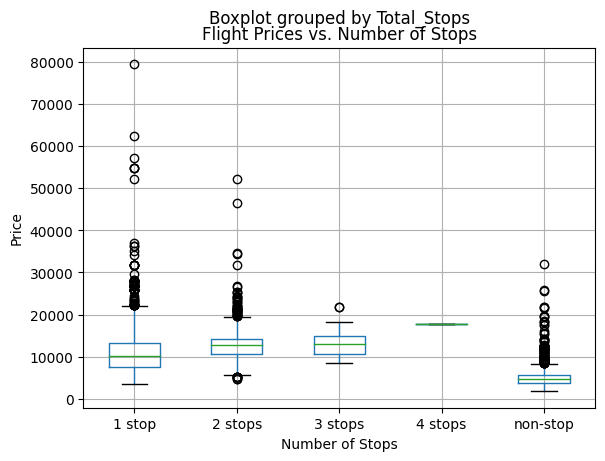

In [128]:
# Visualize the relationship between number of stops and prices
plt.figure(figsize=(8, 6))
flight_data.boxplot(column='Price', by='Total_Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.title('Flight Prices vs. Number of Stops')
plt.show()

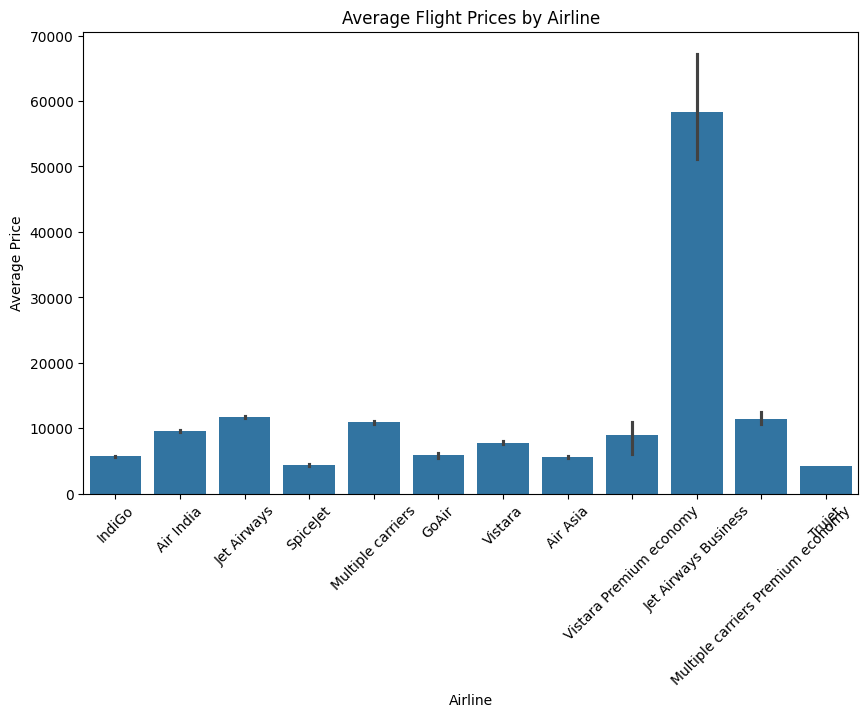

In [130]:
# Visualize the differences in prices for different airlines
plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Price', data=flight_data)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Airline')
plt.xticks(rotation=45)
plt.show()

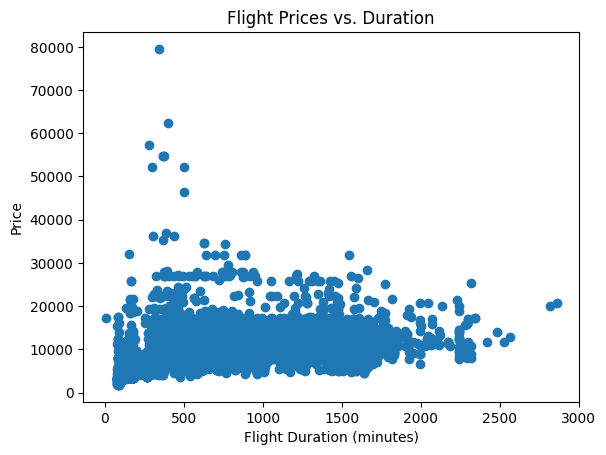

In [131]:
# Relationship between flight duration and prices
plt.scatter(x='Duration', y='Price', data=flight_data)
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Price')
plt.title('Flight Prices vs. Duration')
plt.show()